In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_excel('data.xlsx')
df.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,Cumulative_cases_CH,New_deaths_CH,Cumulative_deaths_CH,New_cases_US,Cumulative_cases_US,New_deaths_US,Cumulative_deaths_US,COMEX_Gold,US_Tbill_10yr
0,2020-01-02,4152.2408,16205.7936,10027.5568,3257.85,1408.30,845.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1531.6,1.88
1,2020-01-03,4144.9649,16071.9259,10013.9573,3234.85,1397.60,838.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1555.2,1.80
2,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,2020-01-06,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1567.7,1.81


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
Date                    344 non-null datetime64[ns]
CSI300                  228 non-null float64
cproducts_ch            228 non-null float64
healthcare_ch           228 non-null float64
SP500                   239 non-null float64
DJI_Retail              239 non-null float64
DJI_Pharma              239 non-null float64
New_cases_CH            343 non-null float64
Cumulative_cases_CH     343 non-null float64
New_deaths_CH           343 non-null float64
Cumulative_deaths_CH    343 non-null float64
New_cases_US            343 non-null float64
Cumulative_cases_US     343 non-null float64
New_deaths_US           343 non-null float64
Cumulative_deaths_US    343 non-null float64
COMEX_Gold              239 non-null float64
US_Tbill_10yr           237 non-null float64
dtypes: datetime64[ns](1), float64(16)
memory usage: 45.8 KB


In [107]:
df = df.dropna()
df = df.drop(['Cumulative_deaths_US','Cumulative_deaths_CH'],axis = 1)
df = df.drop(['Cumulative_cases_CH','Cumulative_cases_US'],axis = 1)
df.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,New_deaths_US,COMEX_Gold,US_Tbill_10yr
1,2020-01-03,4144.9649,16071.9259,10013.9573,3234.85,1397.60,838.26,0.0,0.0,0.0,0.0,1555.2,1.80
4,2020-01-06,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55,3.0,0.0,0.0,0.0,1567.7,1.81
5,2020-01-07,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15,0.0,0.0,0.0,0.0,1576.1,1.83
6,2020-01-08,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45,0.0,0.0,0.0,0.0,1557.5,1.87
7,2020-01-09,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37,0.0,0.0,0.0,0.0,1553.5,1.85


In [108]:
covids=['New_cases_CH', 'New_deaths_CH','New_cases_US','New_deaths_US' ]
for i in covids:
    df[i] = df[i] + 10
    df['l'+ i] = df[i].shift(periods=1, fill_value=10)
    #df = df.drop(i,axis = 1)
df.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,New_deaths_US,COMEX_Gold,US_Tbill_10yr,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US
1,2020-01-03,4144.9649,16071.9259,10013.9573,3234.85,1397.60,838.26,10.0,10.0,10.0,10.0,1555.2,1.80,10.0,10.0,10.0,10.0
4,2020-01-06,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55,13.0,10.0,10.0,10.0,1567.7,1.81,10.0,10.0,10.0,10.0
5,2020-01-07,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15,10.0,10.0,10.0,10.0,1576.1,1.83,13.0,10.0,10.0,10.0
6,2020-01-08,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45,10.0,10.0,10.0,10.0,1557.5,1.87,10.0,10.0,10.0,10.0
7,2020-01-09,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37,10.0,10.0,10.0,10.0,1553.5,1.85,10.0,10.0,10.0,10.0


In [109]:
cols = df.columns
cols

Index(['Date', 'CSI300', 'cproducts_ch', 'healthcare_ch', 'SP500',
       'DJI_Retail', 'DJI_Pharma', 'New_cases_CH', 'New_deaths_CH',
       'New_cases_US', 'New_deaths_US', 'COMEX_Gold', 'US_Tbill_10yr',
       'lNew_cases_CH', 'lNew_deaths_CH', 'lNew_cases_US', 'lNew_deaths_US'],
      dtype='object')

In [110]:
df_log = df.copy()
for col in cols[1:]:
    df_log[col] = np.log(df_log[col])
df_log.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,New_deaths_US,COMEX_Gold,US_Tbill_10yr,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US
1,2020-01-03,8.329650,9.684829,9.211735,8.081738,7.242512,6.731328,2.302585,2.302585,2.302585,2.302585,7.349359,0.587787,2.302585,2.302585,2.302585,2.302585
4,2020-01-06,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245,2.564949,2.302585,2.302585,2.302585,7.357365,0.593327,2.302585,2.302585,2.302585,2.302585
5,2020-01-07,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580,2.302585,2.302585,2.302585,2.302585,7.362709,0.604316,2.564949,2.302585,2.302585,2.302585
6,2020-01-08,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501,2.302585,2.302585,2.302585,2.302585,7.350837,0.625938,2.302585,2.302585,2.302585,2.302585
7,2020-01-09,8.334320,9.713025,9.235180,8.093982,7.253838,6.744495,2.302585,2.302585,2.302585,2.302585,7.348266,0.615186,2.302585,2.302585,2.302585,2.302585


In [111]:
df.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,New_deaths_US,COMEX_Gold,US_Tbill_10yr,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US
1,2020-01-03,4144.9649,16071.9259,10013.9573,3234.85,1397.60,838.26,10.0,10.0,10.0,10.0,1555.2,1.80,10.0,10.0,10.0,10.0
4,2020-01-06,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55,13.0,10.0,10.0,10.0,1567.7,1.81,10.0,10.0,10.0,10.0
5,2020-01-07,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15,10.0,10.0,10.0,10.0,1576.1,1.83,13.0,10.0,10.0,10.0
6,2020-01-08,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45,10.0,10.0,10.0,10.0,1557.5,1.87,10.0,10.0,10.0,10.0
7,2020-01-09,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37,10.0,10.0,10.0,10.0,1553.5,1.85,10.0,10.0,10.0,10.0


In [112]:
indices = ['COMEX_Gold', 'US_Tbill_10yr','CSI300', 'cproducts_ch', 'healthcare_ch', 'SP500',
       'DJI_Retail', 'DJI_Pharma']
for i in indices:
    df['l'+ i] = df[i].shift(periods=1, fill_value=np.nan)
    df_log['l'+ i] = df_log[i].shift(periods=1, fill_value=np.nan)
df_log.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,...,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
1,2020-01-03,8.329650,9.684829,9.211735,8.081738,7.242512,6.731328,2.302585,2.302585,2.302585,...,2.302585,2.302585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-06,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245,2.564949,2.302585,2.302585,...,2.302585,2.302585,7.349359,0.587787,8.329650,9.684829,9.211735,8.081738,7.242512,6.731328
5,2020-01-07,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.357365,0.593327,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245
6,2020-01-08,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.362709,0.604316,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580
7,2020-01-09,8.334320,9.713025,9.235180,8.093982,7.253838,6.744495,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.350837,0.625938,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501


In [113]:
#df = df.drop(['Date','COMEX_Gold', 'US_Tbill_10yr'],axis = 1)
#df_log = df_log.drop(['Date','COMEX_Gold', 'US_Tbill_10yr'],axis = 1)
df = df.drop(['COMEX_Gold', 'US_Tbill_10yr'],axis = 1)
df_log = df_log.drop(['COMEX_Gold', 'US_Tbill_10yr'],axis = 1)
df_log = df_log.dropna()
df = df.dropna()
df_log.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,...,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
4,2020-01-06,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245,2.564949,2.302585,2.302585,...,2.302585,2.302585,7.349359,0.587787,8.329650,9.684829,9.211735,8.081738,7.242512,6.731328
5,2020-01-07,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.357365,0.593327,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245
6,2020-01-08,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.362709,0.604316,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580
7,2020-01-09,8.334320,9.713025,9.235180,8.093982,7.253838,6.744495,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.350837,0.625938,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501
8,2020-01-10,8.334036,9.713712,9.240683,8.091122,7.247252,6.745366,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.348266,0.615186,8.334320,9.713025,9.235180,8.093982,7.253838,6.744495


# split into training and testing data ( ~ 11/05, 11/06 ~)

In [86]:
df_logtrain = df_log.iloc[10:194,:]
df_logtrain.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
19,2020-01-21,8.322226,9.690591,9.284856,8.107958,7.257179,6.755571,2.639057,2.397895,2.302585,2.302585,7.350709,0.609766,8.332032,9.714858,9.254659,8.110613,7.251770,6.758245
20,2020-01-22,8.326500,9.686671,9.272206,8.108247,7.254135,6.753776,4.634729,2.484907,2.302585,2.302585,7.351158,0.576613,8.322226,9.690591,9.284856,8.107958,7.257179,6.755571
21,2020-01-23,8.295024,9.644770,9.251678,8.109387,7.259222,6.748783,5.087596,2.564949,2.302585,2.302585,7.351479,0.570980,8.326500,9.686671,9.272206,8.108247,7.254135,6.753776
32,2020-02-03,8.212937,9.563015,9.208292,8.086078,7.264639,6.719581,4.948760,2.890372,2.302585,2.302585,7.353850,0.553885,8.295024,9.644770,9.251678,8.109387,7.259222,6.748783
33,2020-02-04,8.238970,9.589489,9.245907,8.100947,7.280800,6.735269,7.950502,4.204693,2.564949,2.302585,7.365813,0.431782,8.212937,9.563015,9.208292,8.086078,7.264639,6.719581


In [87]:
len(df_logtrain)

184

df_logtrain.to_csv('train_data.csv')
print('done')

In [88]:
df_logtest = df_log.iloc[194:,:]
df_logtest.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
309,2020-11-06,8.494071,10.093986,9.570237,8.163212,7.582968,6.773835,3.737670,2.397895,11.387056,6.999422,7.576149,-0.235722,8.493947,10.104683,9.595419,8.163500,7.583980,6.776017
312,2020-11-09,8.513456,10.112857,9.588914,8.174844,7.544232,6.780036,3.988984,2.397895,11.571760,7.040536,7.576354,-0.186330,8.494071,10.093986,9.570237,8.163212,7.582968,6.773835
313,2020-11-10,8.507925,10.116999,9.577339,8.173443,7.537441,6.784887,4.043051,2.302585,11.753209,6.977281,7.529568,-0.040822,8.513456,10.112857,9.588914,8.174844,7.544232,6.780036
315,2020-11-12,8.498716,10.109321,9.563354,8.171037,7.548814,6.779558,3.663562,2.302585,11.558558,6.194405,7.536897,-0.020203,8.507925,10.116999,9.577339,8.173443,7.537441,6.784887
316,2020-11-13,8.488146,10.092566,9.558397,8.184556,7.556444,6.793870,3.850148,2.302585,11.805185,7.526179,7.536791,-0.127833,8.498716,10.109321,9.563354,8.171037,7.548814,6.779558


In [89]:
len(df_logtest)

23

df_logtest.to_csv('test_data.csv')
print('done')

# get corr matrix heatmap (before log transformation)

## corr matrix with x and y

In [90]:
df_vis = df.copy()
df_vis.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
4,2020-01-06,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55,10.0,10.0,10.0,10.0,1555.2,1.80,4144.9649,16071.9259,10013.9573,3234.85,1397.60,838.26
5,2020-01-07,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15,13.0,10.0,10.0,10.0,1567.7,1.81,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55
6,2020-01-08,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45,10.0,10.0,10.0,10.0,1576.1,1.83,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15
7,2020-01-09,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37,10.0,10.0,10.0,10.0,1557.5,1.87,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45
8,2020-01-10,4163.1849,16542.9021,10308.0790,3265.35,1404.24,850.11,10.0,10.0,10.0,10.0,1553.5,1.85,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37


In [91]:
visCol = df_vis.columns
visCol

Index(['Date', 'CSI300', 'cproducts_ch', 'healthcare_ch', 'SP500',
       'DJI_Retail', 'DJI_Pharma', 'lNew_cases_CH', 'lNew_deaths_CH',
       'lNew_cases_US', 'lNew_deaths_US', 'lCOMEX_Gold', 'lUS_Tbill_10yr',
       'lCSI300', 'lcproducts_ch', 'lhealthcare_ch', 'lSP500', 'lDJI_Retail',
       'lDJI_Pharma'],
      dtype='object')

In [92]:
visCol = ['Date', 'CSI300', 'cproducts_ch', 'healthcare_ch', 'SP500',
       'DJI_Retail', 'DJI_Pharma', 'COMEX_Gold', 'US_Tbill_10yr', 'New_cases_CH', 'New_deaths_CH',
       'New_cases_US', 'New_deaths_US']
visCol

['Date',
 'CSI300',
 'cproducts_ch',
 'healthcare_ch',
 'SP500',
 'DJI_Retail',
 'DJI_Pharma',
 'COMEX_Gold',
 'US_Tbill_10yr',
 'New_cases_CH',
 'New_deaths_CH',
 'New_cases_US',
 'New_deaths_US']

In [115]:
df_vis = df[visCol]
df_vis.head()

KeyError: "['COMEX_Gold', 'US_Tbill_10yr'] not in index"

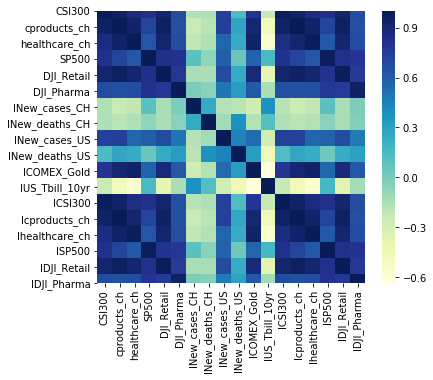

In [116]:
import seaborn as sns

Var_Corr = df_vis.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, cmap="YlGnBu")
#fig.savefig('correlation_matrix.jpg')

# Data Visualization



In [96]:
df.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
4,2020-01-06,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55,10.0,10.0,10.0,10.0,1555.2,1.80,4144.9649,16071.9259,10013.9573,3234.85,1397.60,838.26
5,2020-01-07,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15,13.0,10.0,10.0,10.0,1567.7,1.81,4129.2954,16069.2814,9966.9420,3246.28,1408.76,841.55
6,2020-01-08,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45,10.0,10.0,10.0,10.0,1576.1,1.83,4160.2274,16439.0442,10105.1331,3237.18,1404.84,840.15
7,2020-01-09,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37,10.0,10.0,10.0,10.0,1557.5,1.87,4112.3172,16359.5462,10003.0244,3253.05,1405.87,843.45
8,2020-01-10,4163.1849,16542.9021,10308.0790,3265.35,1404.24,850.11,10.0,10.0,10.0,10.0,1553.5,1.85,4164.3697,16531.5409,10251.5029,3274.70,1413.52,849.37


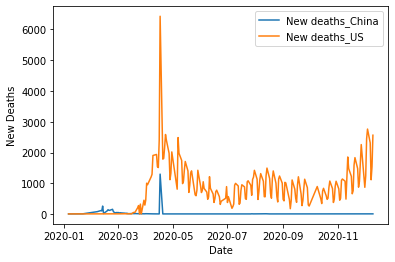

In [117]:
plt.plot(df['Date'],df['New_deaths_CH'],label='New deaths_China')
plt.plot(df['Date'],df['New_deaths_US'],label='New deaths_US')

plt.xlabel("Date")
plt.ylabel('New Deaths')
plt.legend();
#plt.savefig('New Death.jpg')

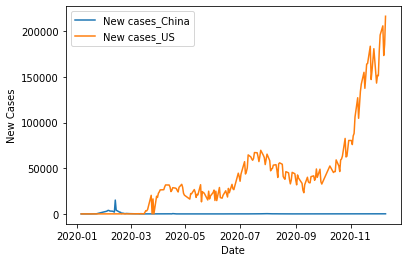

In [118]:
plt.plot(df['Date'],df['New_cases_CH'],label='New cases_China')
plt.plot(df['Date'],df['New_cases_US'],label='New cases_US')
plt.xlabel("Date")
plt.ylabel('New Cases')
plt.legend();
plt.savefig('New Case.jpg')

In [119]:
df_log.head()

,Date,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,New_cases_CH,New_deaths_CH,New_cases_US,...,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
4,2020-01-06,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245,2.564949,2.302585,2.302585,...,2.302585,2.302585,7.349359,0.587787,8.329650,9.684829,9.211735,8.081738,7.242512,6.731328
5,2020-01-07,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.357365,0.593327,8.325862,9.684665,9.207029,8.085265,7.250465,6.735245
6,2020-01-08,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.362709,0.604316,8.333325,9.707415,9.220799,8.082458,7.247679,6.733580
7,2020-01-09,8.334320,9.713025,9.235180,8.093982,7.253838,6.744495,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.350837,0.625938,8.321742,9.702567,9.210643,8.087348,7.248412,6.737501
8,2020-01-10,8.334036,9.713712,9.240683,8.091122,7.247252,6.745366,2.302585,2.302585,2.302585,...,2.302585,2.302585,7.348266,0.615186,8.334320,9.713025,9.235180,8.093982,7.253838,6.744495


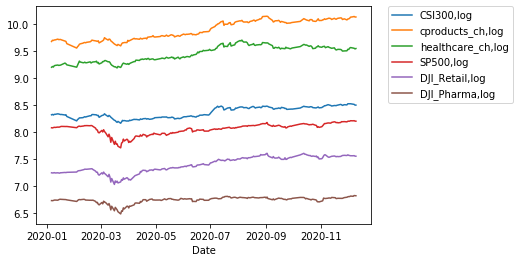

In [120]:
plt.plot(df_log['Date'],df_log['CSI300'],label='CSI300,log')
plt.plot(df_log['Date'],df_log['cproducts_ch'],label='cproducts_ch,log')
plt.plot(df_log['Date'],df_log['healthcare_ch'],label='healthcare_ch,log')
plt.plot(df_log['Date'],df_log['SP500'],label='SP500,log')
plt.plot(df_log['Date'],df_log['DJI_Retail'],label='DJI_Retail,log')
plt.plot(df_log['Date'],df_log['DJI_Pharma'],label='DJI_Pharma,log')
plt.xlabel("Date")
#plt.ylabel('New Cases and Deaths, log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend();
plt.savefig('STOCKS.jpg')

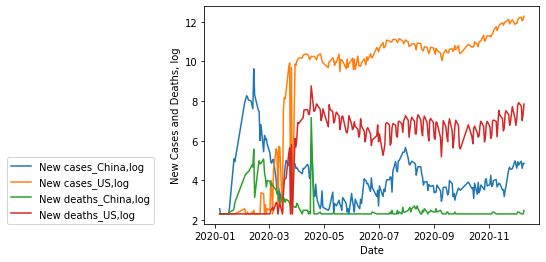

In [128]:
plt.plot(df_log['Date'],df_log['New_cases_CH'],label='New cases_China,log')
plt.plot(df_log['Date'],df_log['New_cases_US'],label='New cases_US,log')
plt.plot(df_log['Date'],df_log['New_deaths_CH'],label='New deaths_China,log')
plt.plot(df_log['Date'],df_log['New_deaths_US'],label='New deaths_US,log')
plt.xlabel("Date")
plt.ylabel('New Cases and Deaths, log')
plt.legend(bbox_to_anchor=(-.15, 0), loc='lower right', borderaxespad=0.)
plt.savefig('New Case and Deaths_log.jpg')

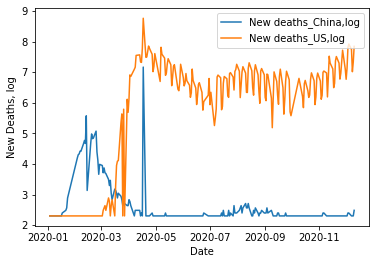

In [46]:
plt.plot(df_log['Date'],df_log['New_deaths_CH'],label='New deaths_China,log')
plt.plot(df_log['Date'],df_log['New_deaths_US'],label='New deaths_US,log')
plt.xlabel("Date")
plt.ylabel('New Deaths, log')
plt.legend();
plt.savefig('New Death_log.jpg')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 4 to 343
Data columns (total 19 columns):
Date              217 non-null datetime64[ns]
CSI300            217 non-null float64
cproducts_ch      217 non-null float64
healthcare_ch     217 non-null float64
SP500             217 non-null float64
DJI_Retail        217 non-null float64
DJI_Pharma        217 non-null float64
lNew_cases_CH     217 non-null float64
lNew_deaths_CH    217 non-null float64
lNew_cases_US     217 non-null float64
lNew_deaths_US    217 non-null float64
lCOMEX_Gold       217 non-null float64
lUS_Tbill_10yr    217 non-null float64
lCSI300           217 non-null float64
lcproducts_ch     217 non-null float64
lhealthcare_ch    217 non-null float64
lSP500            217 non-null float64
lDJI_Retail       217 non-null float64
lDJI_Pharma       217 non-null float64
dtypes: datetime64[ns](1), float64(18)
memory usage: 33.9 KB


In [100]:
df.describe()

,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000
mean,4340.860085,20212.775177,12976.209891,3186.139724,1657.172535,852.391429,290.700461,25.976959,42325.225806,784.718894,1776.679724,0.872166,4337.193910,20170.221305,12957.368214,3184.14318,1654.782811,852.010046
std,437.610495,3549.806492,1882.979287,311.163482,238.249203,47.472931,1207.160875,91.876096,44858.774963,739.224380,142.813428,0.350591,435.892532,3543.809681,1892.090165,309.44191,238.240060,47.250954
min,3530.305800,14228.676100,9841.838000,2237.400000,1135.920000,657.450000,10.000000,10.000000,10.000000,10.000000,1473.000000,0.520000,3530.305800,14228.676100,9841.838000,2237.40000,1135.920000,657.450000
25%,3954.988300,16791.478900,11082.785300,3002.100000,1463.440000,846.120000,26.000000,10.000000,16210.000000,265.000000,1667.500000,0.660000,3954.988300,16748.850400,11077.561200,3002.10000,1458.620000,845.580000
50%,4189.886200,19221.376900,13489.131900,3257.300000,1654.350000,862.010000,46.000000,10.000000,31719.000000,707.000000,1771.900000,0.730000,4166.734400,19217.761900,13445.081100,3253.05000,1641.330000,861.680000
75%,4744.468700,23596.948600,14601.996100,3383.540000,1882.480000,881.440000,112.000000,13.000000,54385.000000,1119.000000,1903.000000,0.890000,4740.678400,23585.674300,14601.996100,3381.99000,1877.020000,881.070000
max,5067.144700,25656.985200,16486.795600,3702.250000,2022.700000,924.400000,15162.000000,1300.000000,205847.000000,6419.000000,2075.200000,1.870000,5067.144700,25656.985200,16486.795600,3702.25000,2022.700000,924.400000


In [101]:
df_log.describe()

,CSI300,cproducts_ch,healthcare_ch,SP500,DJI_Retail,DJI_Pharma,lNew_cases_CH,lNew_deaths_CH,lNew_cases_US,lNew_deaths_US,lCOMEX_Gold,lUS_Tbill_10yr,lCSI300,lcproducts_ch,lhealthcare_ch,lSP500,lDJI_Retail,lDJI_Pharma
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,8.370731,9.898403,9.460167,8.061490,7.402106,6.746383,4.108394,2.648248,8.954236,5.762473,7.479245,-0.197846,8.369921,9.896311,9.458590,8.060911,7.400651,6.745949
std,0.101395,0.178278,0.147464,0.102796,0.148811,0.058916,1.332466,0.731760,3.312151,1.885596,0.081175,0.327663,0.101017,0.178108,0.148283,0.102323,0.148822,0.058677
min,8.169140,9.563015,9.194398,7.713070,7.035198,6.488369,2.302585,2.302585,2.302585,2.302585,7.295056,-0.653926,8.169140,9.563015,9.194398,7.713070,7.035198,6.488369
25%,8.282733,9.728627,9.313148,8.007067,7.288545,6.740661,3.258097,2.302585,9.693384,5.579730,7.419081,-0.415515,8.282733,9.726085,9.312677,8.007067,7.285246,6.740023
50%,8.340429,9.863778,9.509640,8.088654,7.411163,6.759267,3.828641,2.302585,10.364671,6.561031,7.479808,-0.314711,8.334888,9.863590,9.506369,8.087348,7.403262,6.758884
75%,8.464735,10.068873,9.588914,8.126678,7.540345,6.781557,4.718499,2.564949,10.903844,7.020191,7.551187,-0.116534,8.463936,10.068395,9.588914,8.126220,7.537441,6.781137
max,8.530533,10.152571,9.710315,8.216696,7.612189,6.829145,9.626548,7.170120,12.234888,8.767018,7.637813,0.625938,8.530533,10.152571,9.710315,8.216696,7.612189,6.829145
